In [1]:
import trackintel as ti
tpls = ti.io.file.read_triplegs_csv('triplegs.csv', index_col='id')

/usr/local/lib/python3.9/site-packages/geopandas/_compat.py:123: UserWarning: The Shapely GEOS version (3.11.1-CAPI-1.17.1) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/trackintel/io/file.py:5: UserWarning: Shapely 2.0 is installed, but because PyGEOS is also installed, GeoPandas will still use PyGEOS by default for now. To force to use and test Shapely 2.0, you have to set the environment variable USE_PYGEOS=0. You can do this before starting the Python process, or in your code before importing geopandas:

import os
os.environ['USE_PYGEOS'] = '0'
import geopandas

In a future release, GeoPandas will switch to using Shapely by default. If you are using PyGEOS directly (calling PyGEOS functions on geometries from GeoPandas), this will then stop working and you are encouraged to migrate from PyGEOS to Shapely 2.0 (https://shapely.readthedocs.io/en/latest/

In [2]:
# Predict the transport mode of triplegs.
"""simple-coarse method includes {'slow_mobility', 'motorized_mobility', 'fast_mobility'}. 
In the default classification, slow_mobility (<15 km/h) includes transport modes such as walking or cycling, 
motorized_mobility (<100 km/h) modes such as car or train, 
and fast_mobility (>100 km/h) modes such as high-speed rail or airplanes."""
mode_tpls  = tpls.as_triplegs.predict_transport_mode()
mode_tpls

/usr/local/lib/python3.9/site-packages/trackintel/geogr/distances.py:227: UserWarning: The CRS of your data is not defined.
  warnings.warn("The CRS of your data is not defined.")
/usr/local/lib/python3.9/site-packages/pygeos/io.py:89: UserWarning: The shapely GEOS version (3.11.1-CAPI-1.17.1) is incompatible with the PyGEOS GEOS version (3.10.4-CAPI-1.16.2). Conversions between both will be slow
  warnings.warn(


,user_id,started_at,finished_at,geom,mode
id,,,,,
0,0,2022-09-07 20:28:01-04:00,2022-09-07 20:36:01-04:00,"LINESTRING (-81.58150 30.27550, -81.72430 30.3...",fast_mobility
1,0,2022-09-07 21:21:37-04:00,2022-09-07 21:21:39-04:00,"LINESTRING (-81.58150 30.27550, -81.63610 30.2...",fast_mobility
2,0,2022-09-20 14:08:22-04:00,2022-09-20 14:10:52-04:00,"LINESTRING (-81.58670 30.35240, -81.75290 30.2...",fast_mobility
3,0,2022-09-20 14:13:46-04:00,2022-09-20 14:17:43-04:00,"LINESTRING (-81.68800 30.35620, -81.75290 30.2...",fast_mobility
4,0,2022-09-20 23:47:54-04:00,2022-09-20 23:51:20-04:00,"LINESTRING (-81.82170 30.28510, -81.75290 30.2...",fast_mobility
...,...,...,...,...,...
535420,5171,2022-10-28 22:02:07-04:00,2022-10-28 22:03:29-04:00,"LINESTRING (-81.74895 30.20290, -81.74980 30.2...",slow_mobility
535421,5171,2022-10-28 22:30:26-04:00,2022-10-28 22:32:17-04:00,"LINESTRING (-81.74959 30.20178, -81.74916 30.2...",slow_mobility
535422,5171,2022-10-28 23:48:20-04:00,2022-10-28 23:53:59-04:00,"LINESTRING (-81.74633 30.17230, -81.74538 30.1...",motorized_mobility


In [3]:
mode_split = ti.analysis.modal_split.calculate_modal_split(tpls = mode_tpls, metric='count', freq='D', per_user=False)

(<Figure size 4110.24x2540.27 with 1 Axes>,
 <Axes: xlabel='days', ylabel='Percentage of daily count'>)

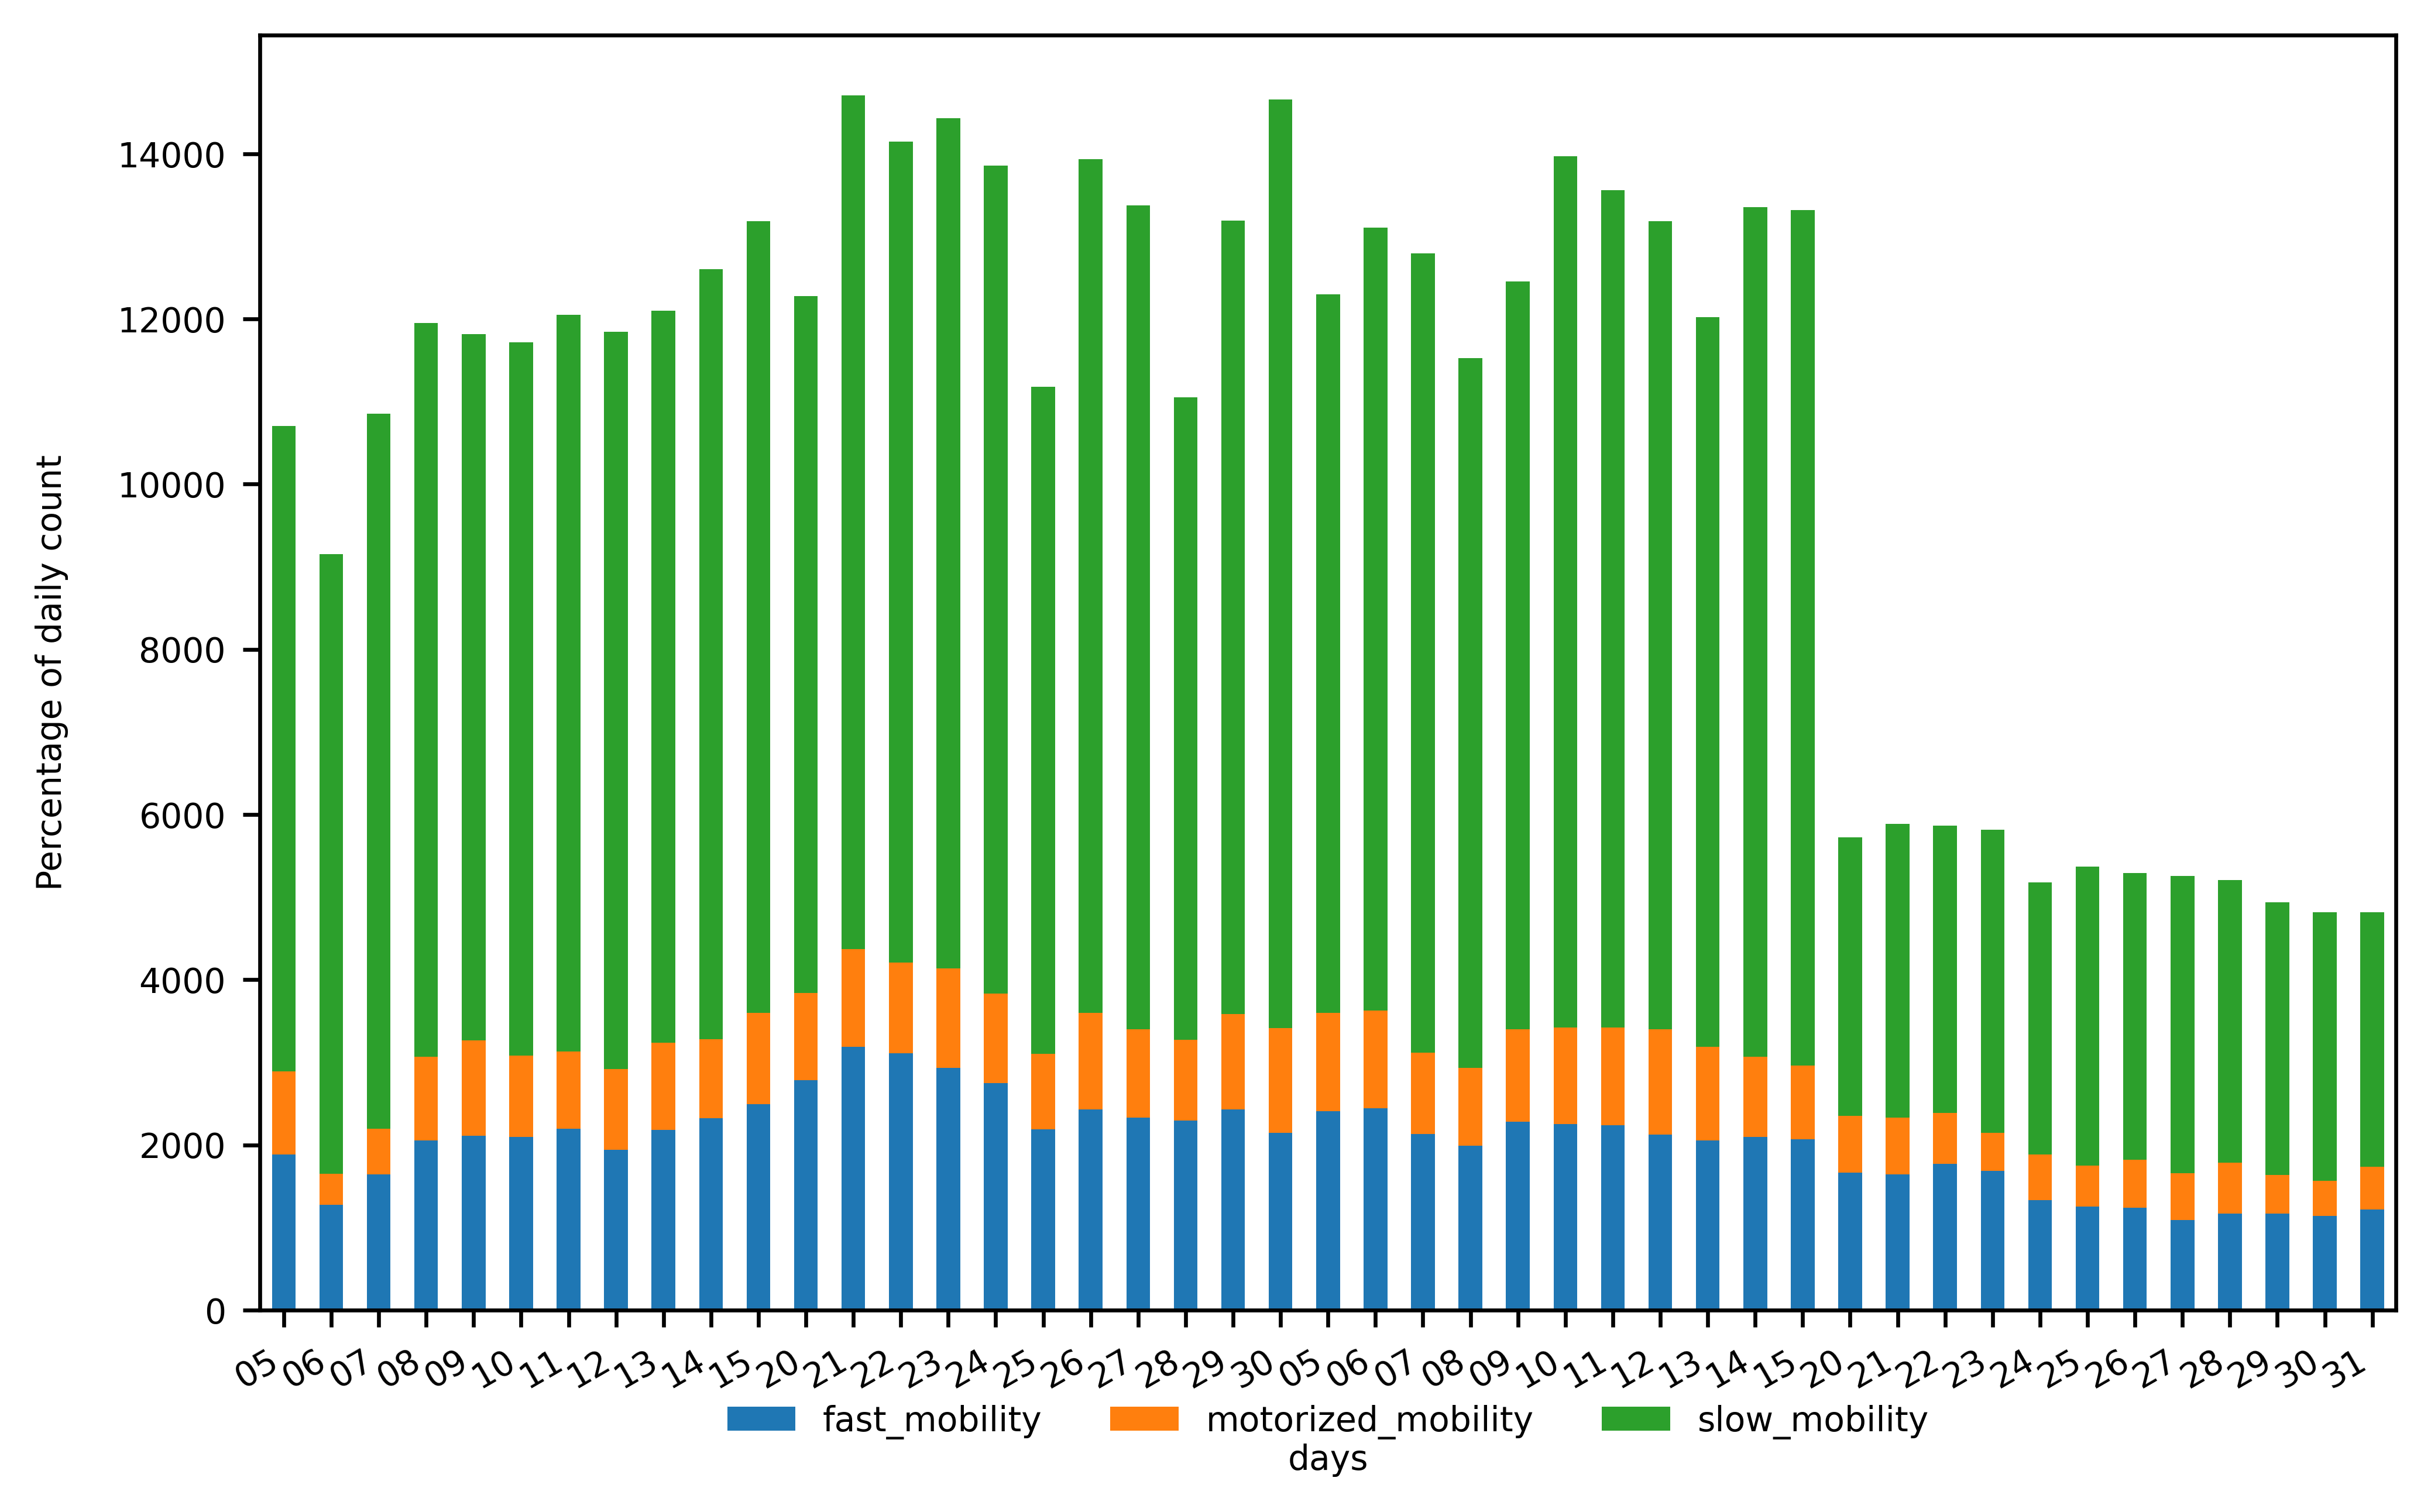

In [4]:
ti.visualization.modal_split.plot_modal_split(mode_split, date_fmt_x_axis='%d',
                 y_label='Percentage of daily count', x_label='days')

In [5]:
mode_split_user = ti.analysis.modal_split.calculate_modal_split(tpls = mode_tpls, freq='d', metric='count', per_user=True)

In [6]:
mode_split_user

mode                               fast_mobility  motorized_mobility  \
user_id timestamp                                                      
0       2022-09-07 00:00:00-04:00              2                   0   
        2022-09-20 00:00:00-04:00              3                   0   
        2022-09-21 00:00:00-04:00             14                   0   
        2022-09-22 00:00:00-04:00              1                   0   
        2022-09-23 00:00:00-04:00              8                   0   
...                                          ...                 ...   
5171    2022-10-25 00:00:00-04:00              0                   0   
        2022-10-26 00:00:00-04:00              0                   0   
        2022-10-28 00:00:00-04:00              0                   1   
        2022-10-29 00:00:00-04:00              1                   0   
        2022-10-30 00:00:00-04:00              0                   0   

mode                               slow_mobility  
user_id timestamp                                 
0       2022-09-07 00:00:00-04:00              0  
        2022-09-20 00:00:00-04:00              0  
        2022-09-21 00:00:00-04:00              0  
        2022-09-22 00:00:00-04:00              0  
        2022-09-23 00:00:00-04:00              0  
...                                          ...  
5171    2022-10-25 00:00:00-04:00              2  
        2022-10-26 00:00:00-04:00              1  
        2022-10-28 00:00:00-04:00              4  
        2022-10-29 00:00:00-04:00              0  
        2022-10-30 00:00:00-04:00              1  

[99639 rows x 3 columns]

In [7]:
# Find the user_id with the most occurrences and Visualization.
mode_test = mode_split_user.loc[3]
mode_test


mode,fast_mobility,motorized_mobility,slow_mobility
timestamp,,,
2022-09-07 00:00:00-04:00,2,2,22
2022-09-20 00:00:00-04:00,1,6,23
2022-09-21 00:00:00-04:00,2,14,24
2022-09-22 00:00:00-04:00,2,6,21
2022-09-23 00:00:00-04:00,0,6,21
2022-09-24 00:00:00-04:00,1,6,30
2022-09-25 00:00:00-04:00,4,2,26
2022-09-26 00:00:00-04:00,3,2,25
2022-09-29 00:00:00-04:00,4,3,22


(<Figure size 4110.24x2540.27 with 1 Axes>,
 <Axes: xlabel='days', ylabel='Percentage of daily count'>)

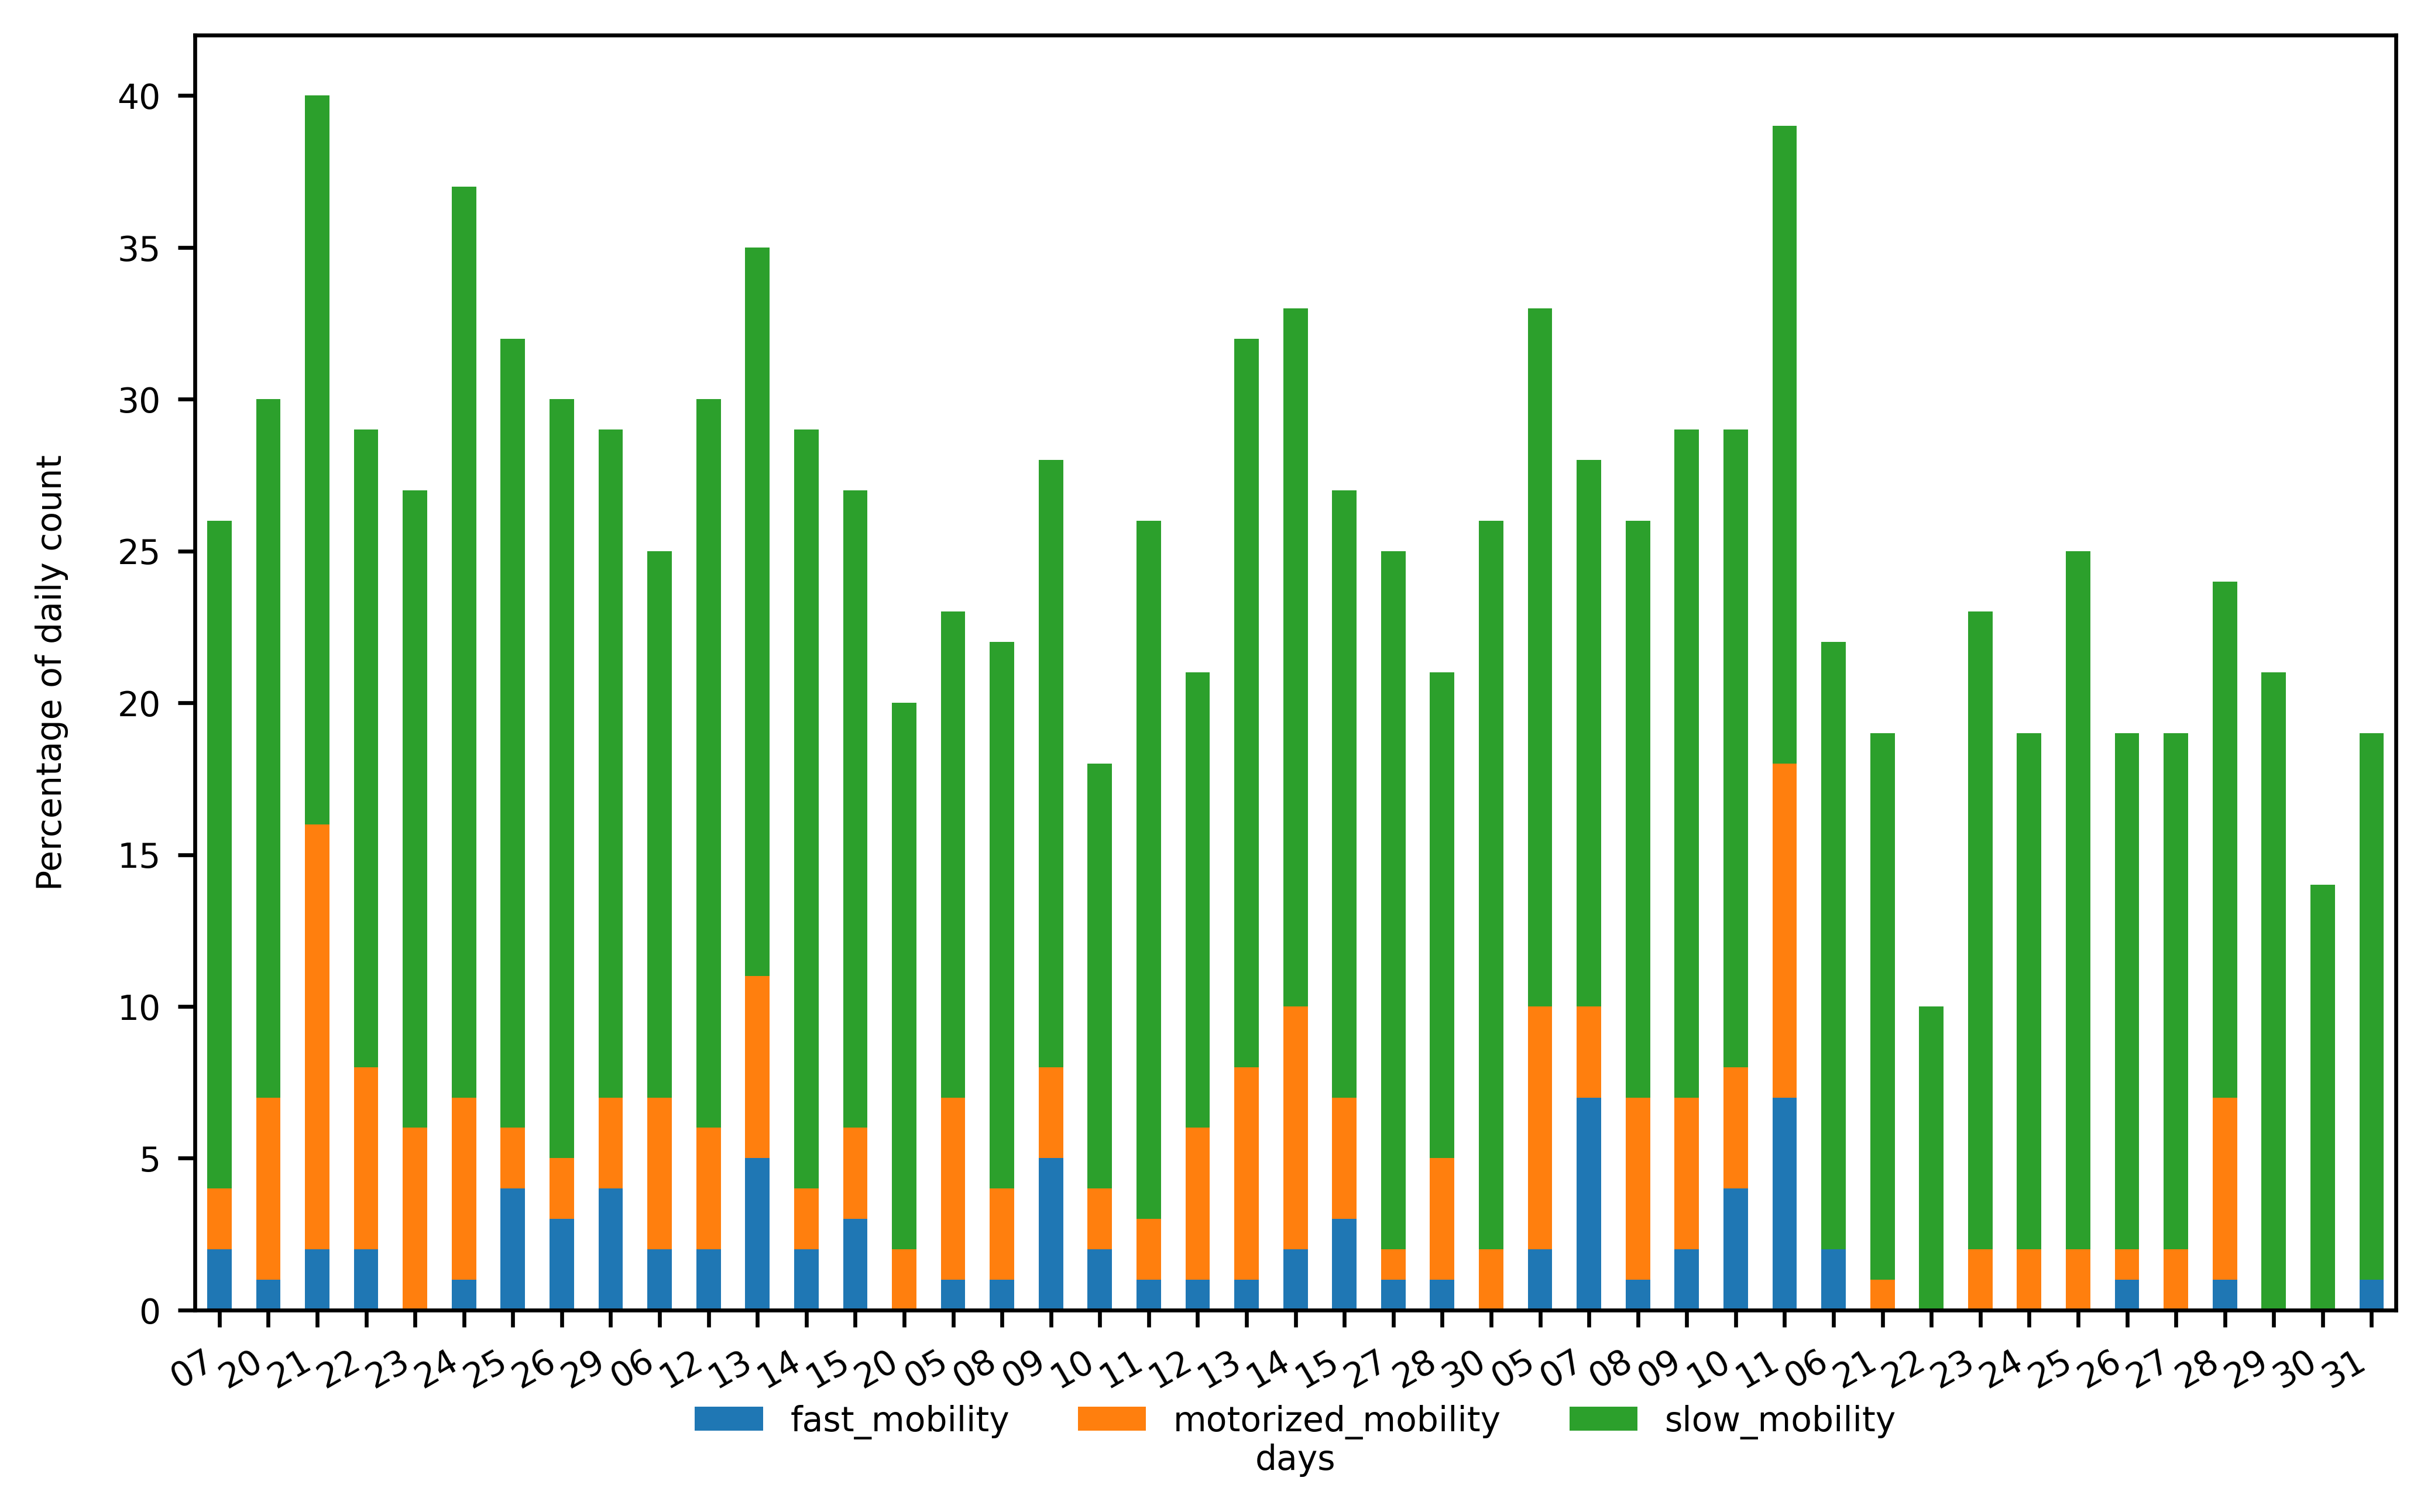

In [8]:
ti.visualization.modal_split.plot_modal_split(mode_test, date_fmt_x_axis='%d',
                 y_label='Percentage of daily count', x_label='days')